In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [193]:
house_df = pd.read_csv('data\Housing.csv')
house_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\axz14\AppData\Local\Temp\ipykernel_2468\842856499.py:1: SyntaxWarning: invalid escape sequence '\H'
  house_df = pd.read_csv('data\Housing.csv')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


* price: 가격
* area: 면적
* bedrooms: 침실 수
* bathrooms: 욕실 수
* stories: 층 수
* mainroad: 주도로
* guestroom: 손님방
* basement: 지하실
* hotwaterheating: 온수난방
* airconditioning: 에어컨
* parking: 주차 공간
* prefarea: 선호 지역
* furnishingstatus: 가구 상태

In [194]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [195]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [196]:
def convert(data):
    if data == 'yes':
        return 1
    else:
        return 0

In [197]:
house_df['mainroad'] = house_df['mainroad'].apply(convert)

In [198]:
# 집의 옵션들을 숫자로 변환
house_df['guestroom'] = house_df['guestroom'].apply(convert)
house_df['basement'] = house_df['basement'].apply(convert)
house_df['hotwaterheating'] = house_df['hotwaterheating'].apply(convert)
house_df['airconditioning'] = house_df['airconditioning'].apply(convert)
house_df['prefarea'] = house_df['prefarea'].apply(convert)
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [199]:
# house_df['furnishingstatus'] 원핫인코딩
house_df = pd.get_dummies(house_df, columns=['furnishingstatus'])
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False


<Axes: >

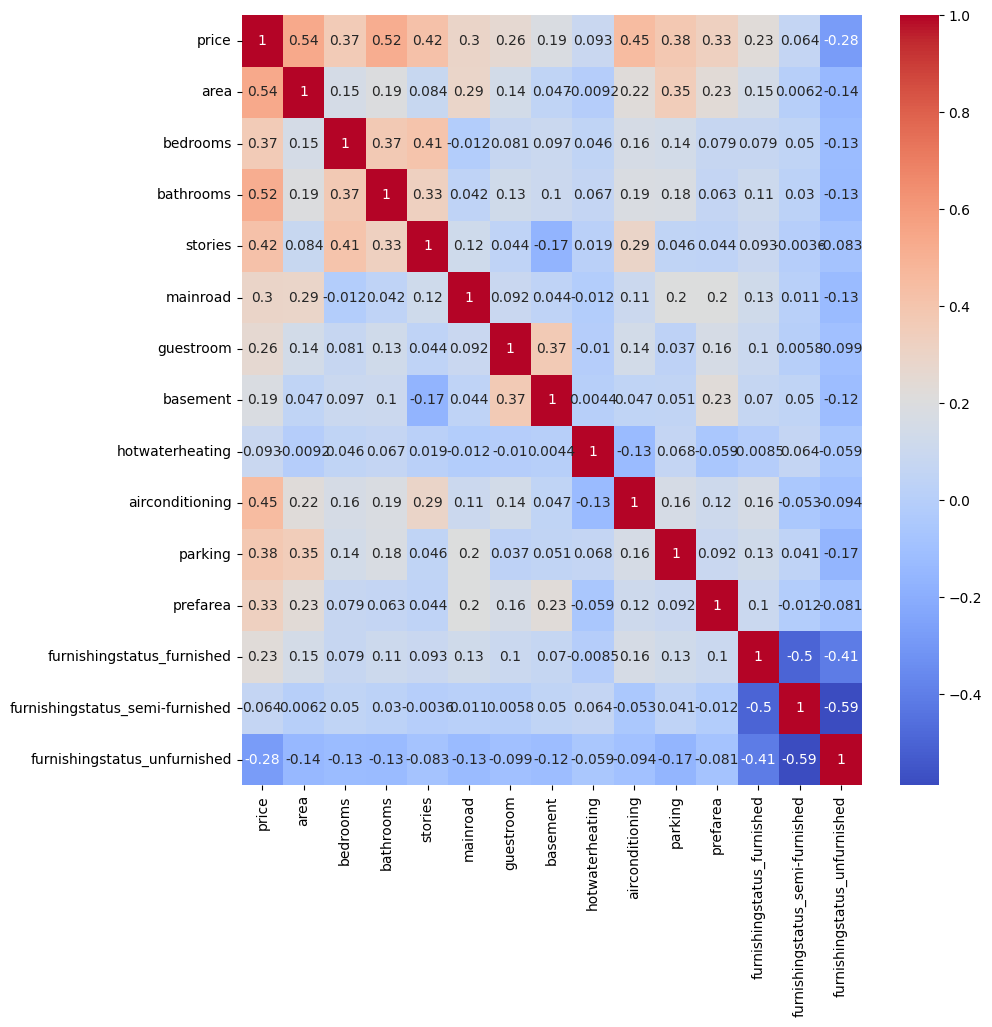

In [200]:
plt.figure(figsize=(10, 10))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')

In [201]:
house_df.drop(['hotwaterheating', 'basement', 'mainroad', 'guestroom', 'furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'], axis=1, inplace=True)
house_df.head()

,price,area,bedrooms,bathrooms,stories,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,2,1
1,12250000,8960,4,4,4,1,3,0
2,12250000,9960,3,2,2,0,2,1
3,12215000,7500,4,2,2,1,3,1
4,11410000,7420,4,1,2,1,2,0


<Axes: >

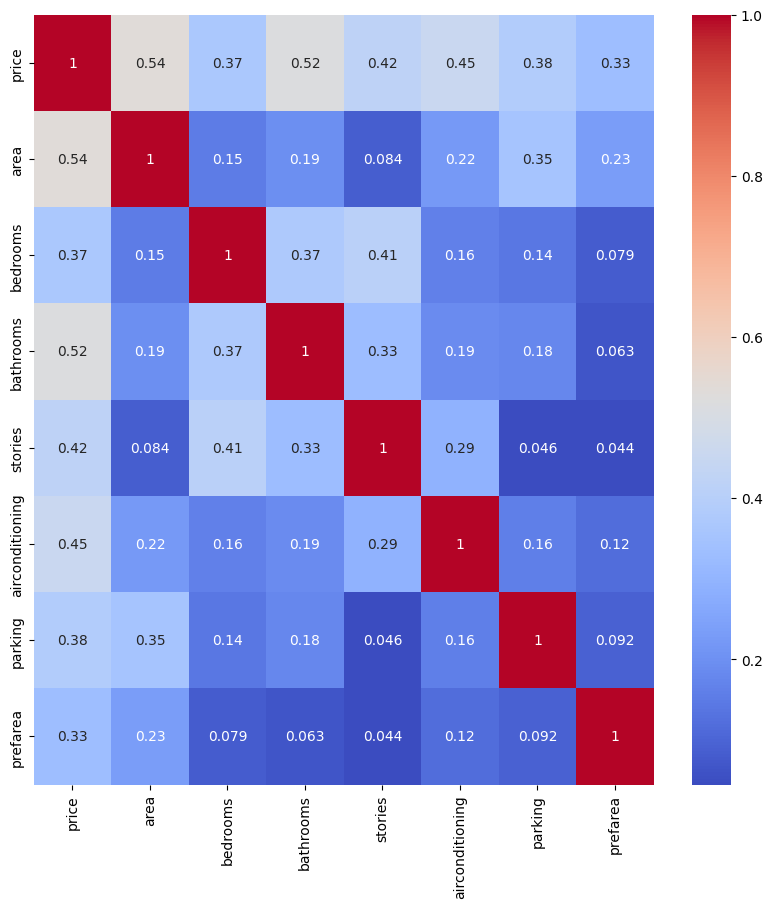

In [202]:
plt.figure(figsize=(10, 10))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')

In [203]:
X = house_df.drop('price', axis=1)
y = house_df['price']

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 7), (109, 7), (436,), (109,))

In [205]:
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

In [206]:
def plot_predictions(name_, pred, actual):
  df = pd.DataFrame({'prediction': pred, 'actual': y_test})
  df = df.sort_values(by='actual').reset_index(drop=True)

  plt.figure(figsize=(6, 6))
  plt.scatter(df.index, df['prediction'], marker='x', color='r')
  plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
  plt.title(name_, fontsize=15)
  plt.legend(['prediction', 'actual'], fontsize=12)
  plt.show()

In [207]:
def mse_eval(name_, pred, actual):
  global my_predictions
  global colors

  plot_predictions(name_, pred, actual)

  mse = mean_squared_error(pred, actual)
  my_predictions[name_] = mse

  y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

  df = pd.DataFrame(y_value, columns=['model', 'mse'])
  print(df)

  min_ = df['mse'].min() - 10
  max_ = df['mse'].max() + 10

  length = len(df)

  plt.figure(figsize=(10, length))
  ax = plt.subplot()
  ax.set_yticks(np.arange(len(df)))
  ax.set_yticklabels(df['model'], fontsize=15)
  bars = ax.barh(np.arange(len(df)), df['mse'])

  for i, v in enumerate(df['mse']):
    idx = np.random.choice(len(colors))
    bars[i].set_color(colors[idx])
    ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

  plt.title('MSE Error', fontsize=18)
  plt.xlim(min_, max_)

  plt.show()

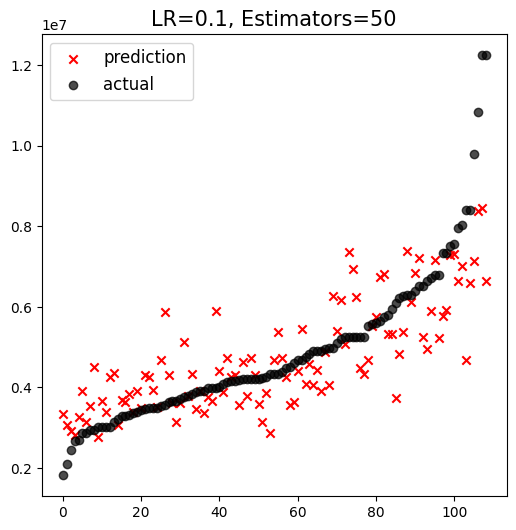

                   model           mse
0  LR=0.1, Estimators=50  1.446939e+12


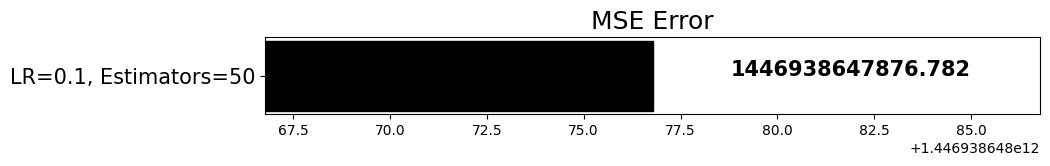

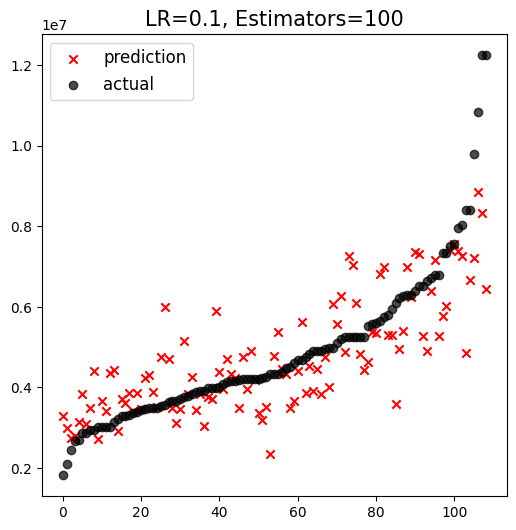

                    model           mse
0  LR=0.1, Estimators=100  1.461280e+12
1   LR=0.1, Estimators=50  1.446939e+12


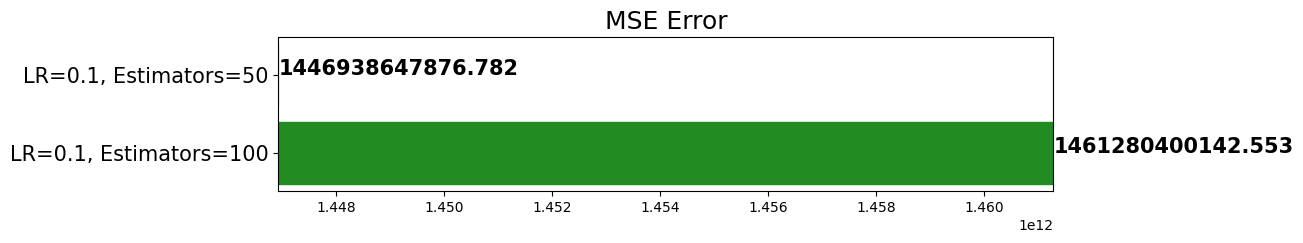

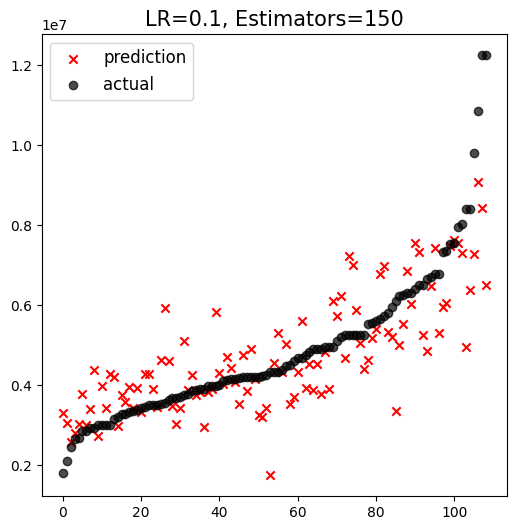

                    model           mse
0  LR=0.1, Estimators=100  1.461280e+12
1  LR=0.1, Estimators=150  1.460499e+12
2   LR=0.1, Estimators=50  1.446939e+12


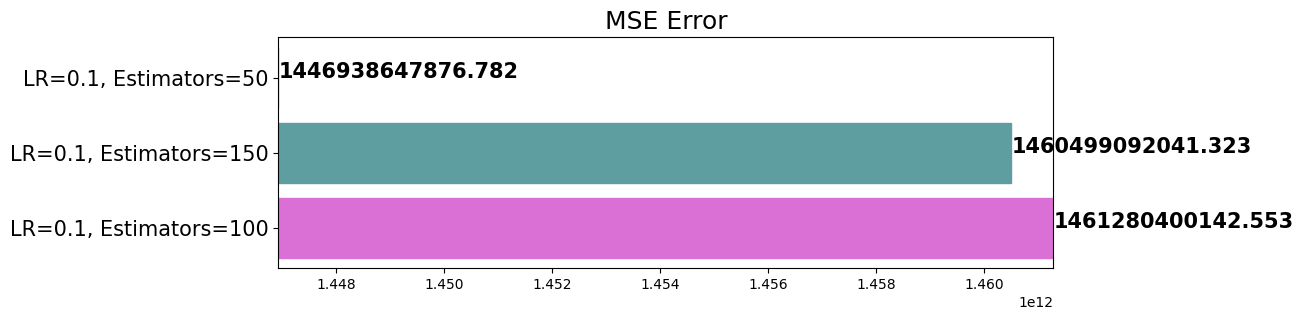

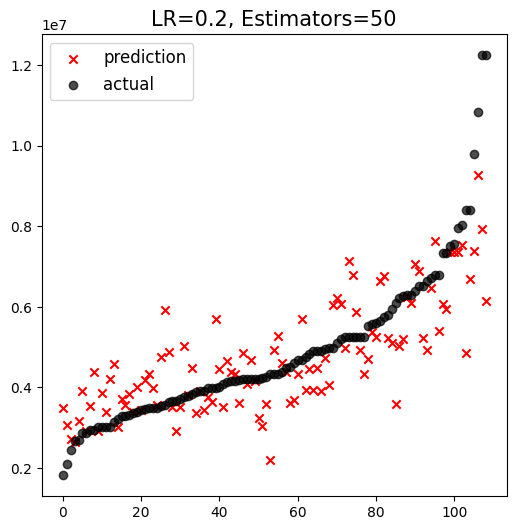

                    model           mse
0   LR=0.2, Estimators=50  1.482964e+12
1  LR=0.1, Estimators=100  1.461280e+12
2  LR=0.1, Estimators=150  1.460499e+12
3   LR=0.1, Estimators=50  1.446939e+12


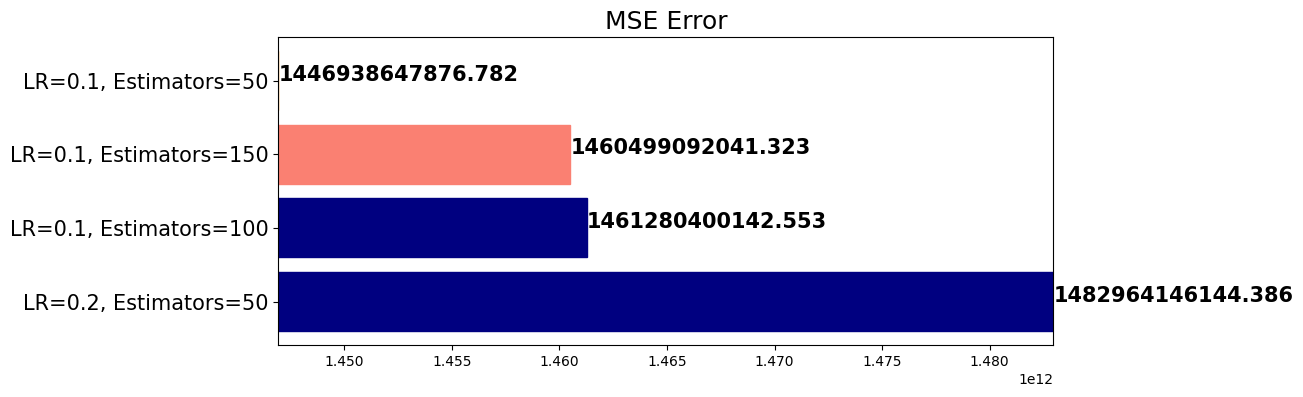

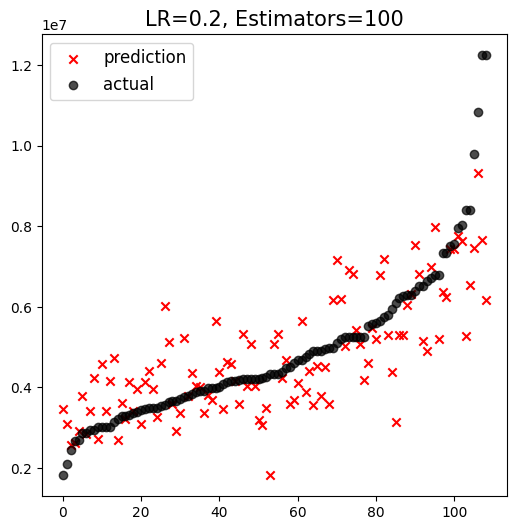

                    model           mse
0  LR=0.2, Estimators=100  1.631646e+12
1   LR=0.2, Estimators=50  1.482964e+12
2  LR=0.1, Estimators=100  1.461280e+12
3  LR=0.1, Estimators=150  1.460499e+12
4   LR=0.1, Estimators=50  1.446939e+12


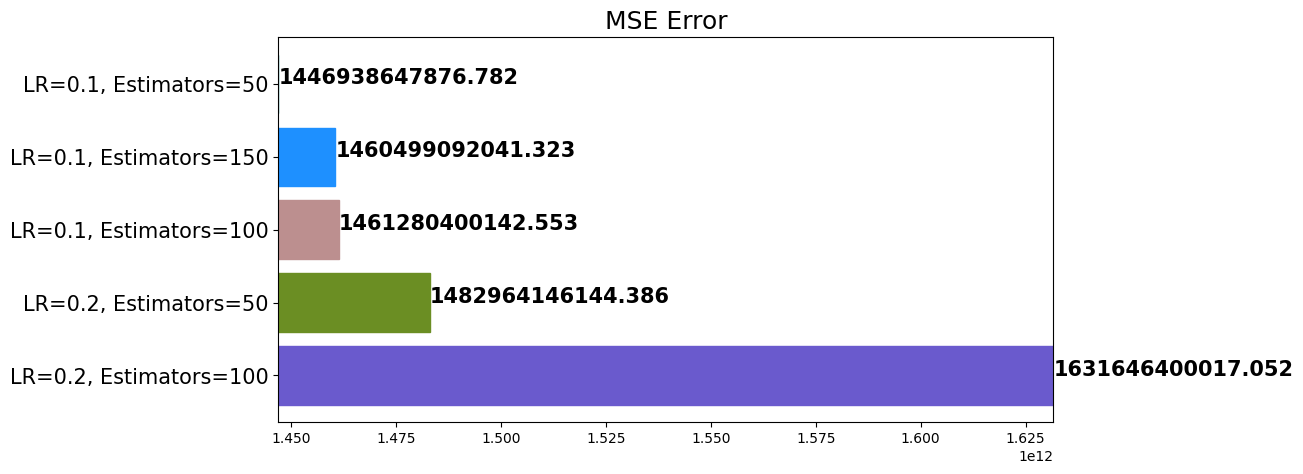

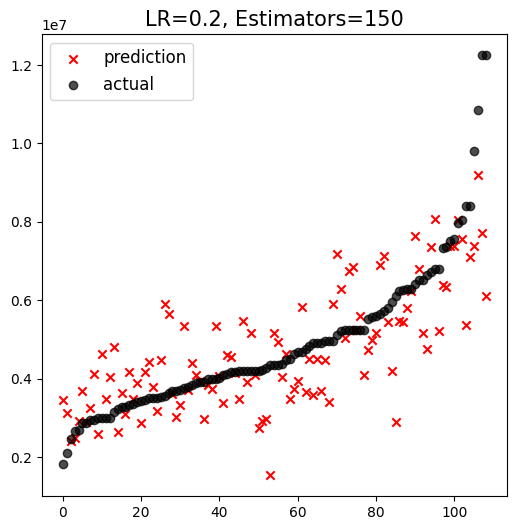

                    model           mse
0  LR=0.2, Estimators=150  1.704247e+12
1  LR=0.2, Estimators=100  1.631646e+12
2   LR=0.2, Estimators=50  1.482964e+12
3  LR=0.1, Estimators=100  1.461280e+12
4  LR=0.1, Estimators=150  1.460499e+12
5   LR=0.1, Estimators=50  1.446939e+12


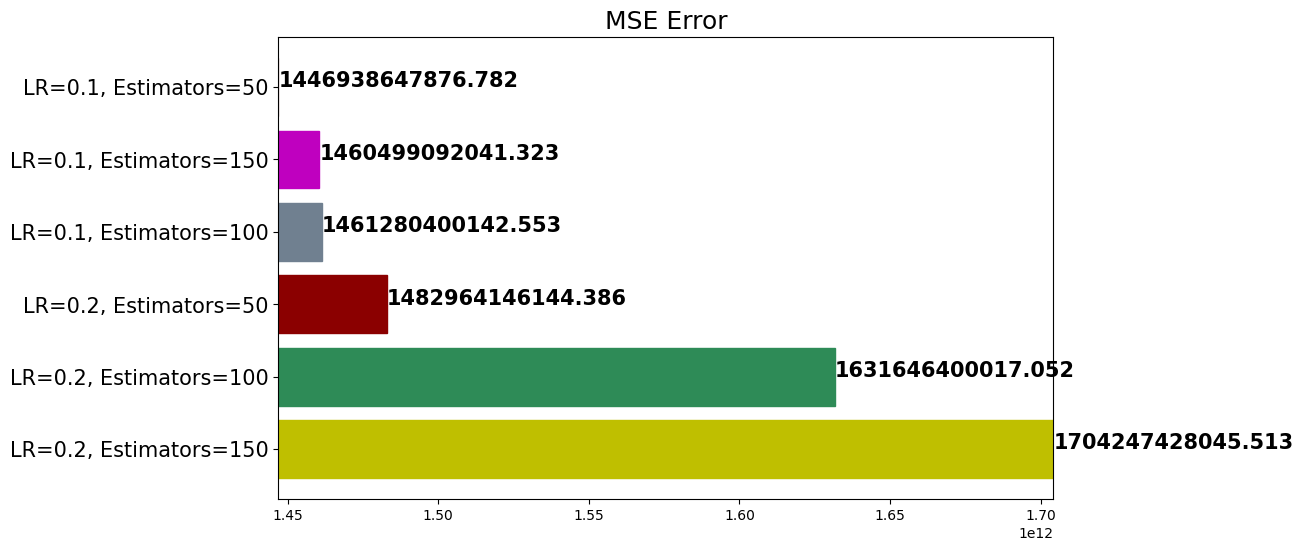

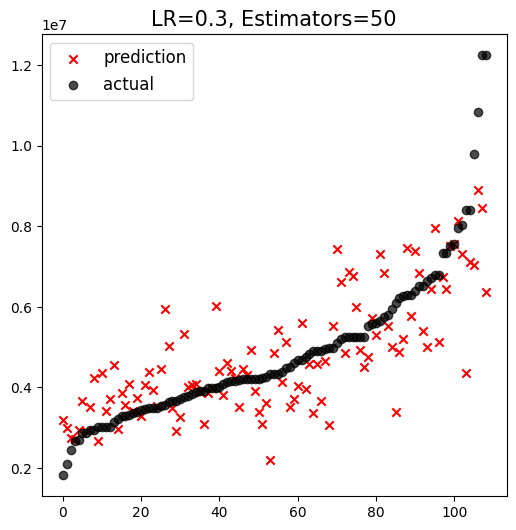

                    model           mse
0  LR=0.2, Estimators=150  1.704247e+12
1  LR=0.2, Estimators=100  1.631646e+12
2   LR=0.3, Estimators=50  1.577891e+12
3   LR=0.2, Estimators=50  1.482964e+12
4  LR=0.1, Estimators=100  1.461280e+12
5  LR=0.1, Estimators=150  1.460499e+12
6   LR=0.1, Estimators=50  1.446939e+12


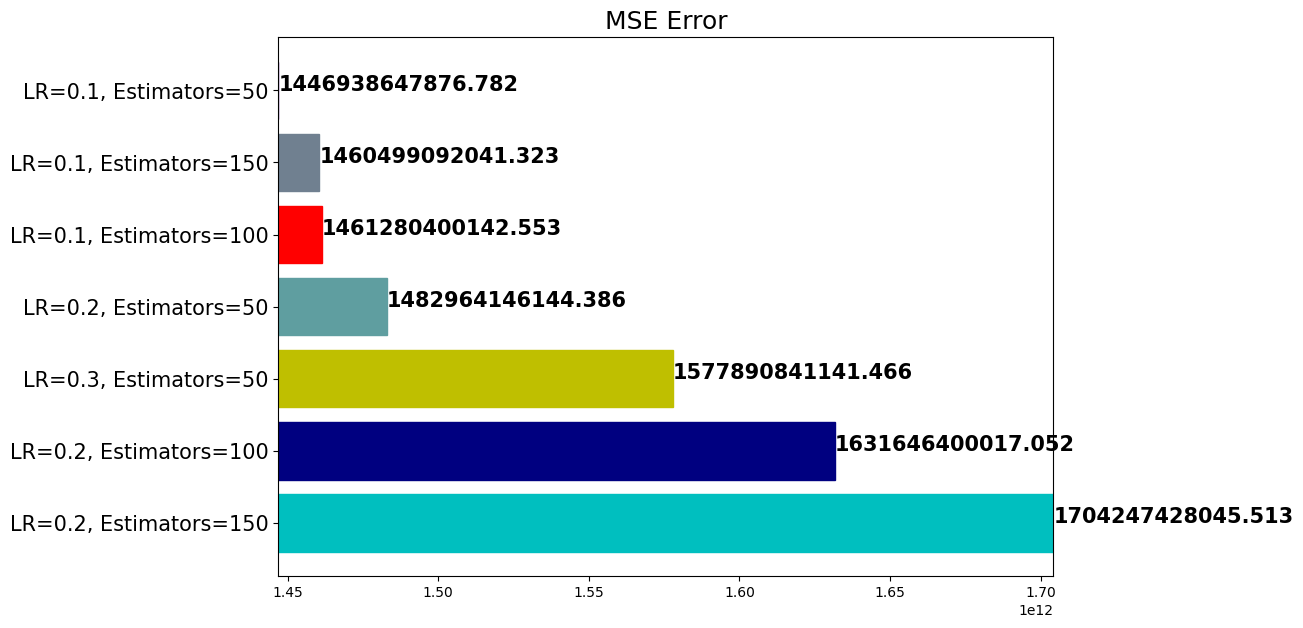

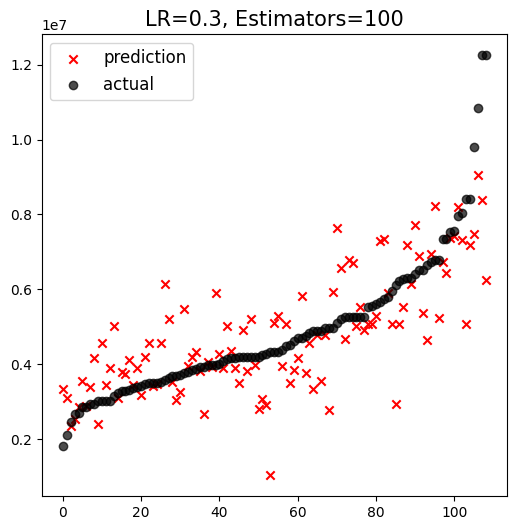

                    model           mse
0  LR=0.3, Estimators=100  1.730818e+12
1  LR=0.2, Estimators=150  1.704247e+12
2  LR=0.2, Estimators=100  1.631646e+12
3   LR=0.3, Estimators=50  1.577891e+12
4   LR=0.2, Estimators=50  1.482964e+12
5  LR=0.1, Estimators=100  1.461280e+12
6  LR=0.1, Estimators=150  1.460499e+12
7   LR=0.1, Estimators=50  1.446939e+12


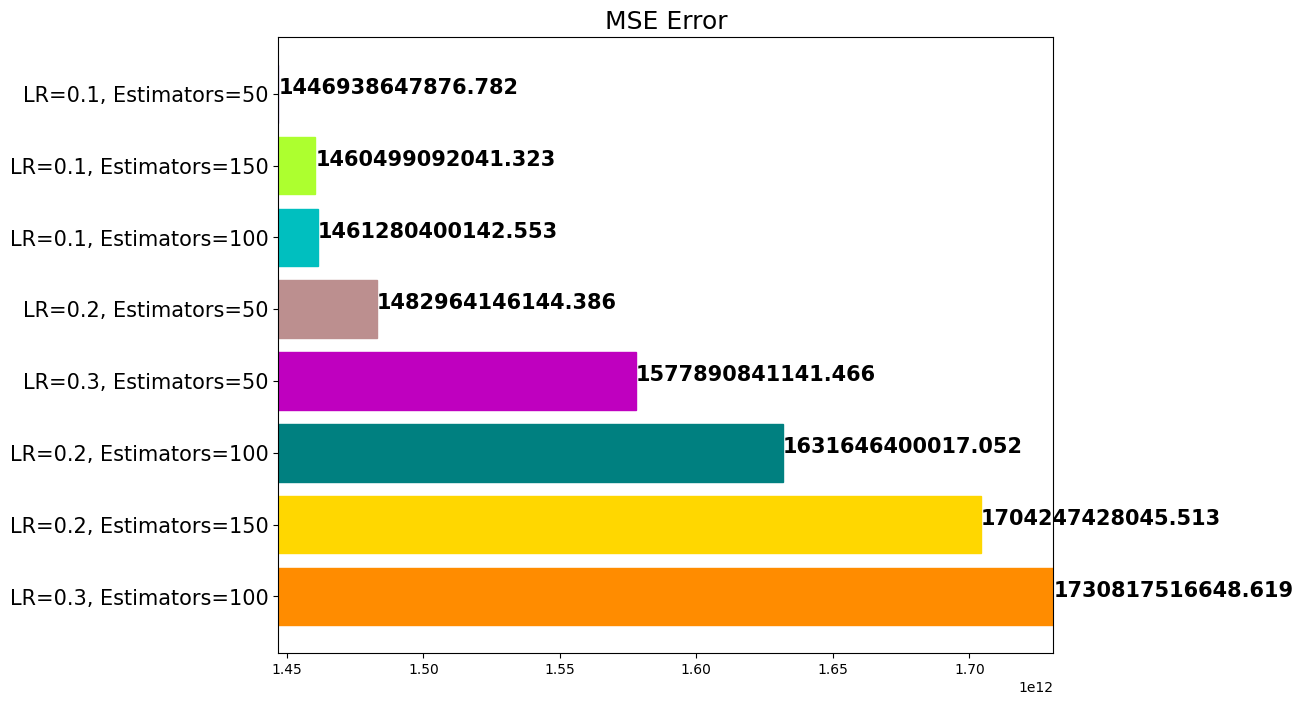

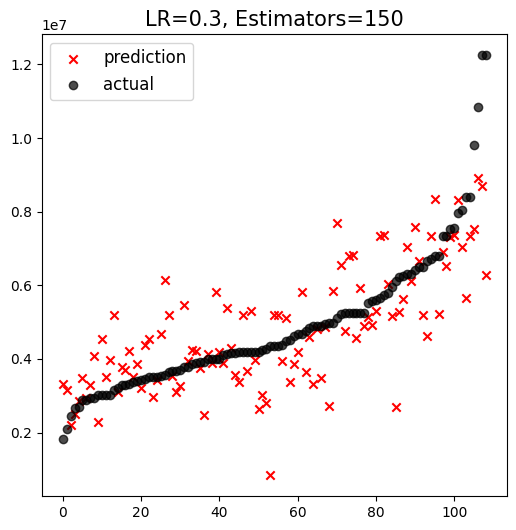

                    model           mse
0  LR=0.3, Estimators=150  1.767596e+12
1  LR=0.3, Estimators=100  1.730818e+12
2  LR=0.2, Estimators=150  1.704247e+12
3  LR=0.2, Estimators=100  1.631646e+12
4   LR=0.3, Estimators=50  1.577891e+12
5   LR=0.2, Estimators=50  1.482964e+12
6  LR=0.1, Estimators=100  1.461280e+12
7  LR=0.1, Estimators=150  1.460499e+12
8   LR=0.1, Estimators=50  1.446939e+12


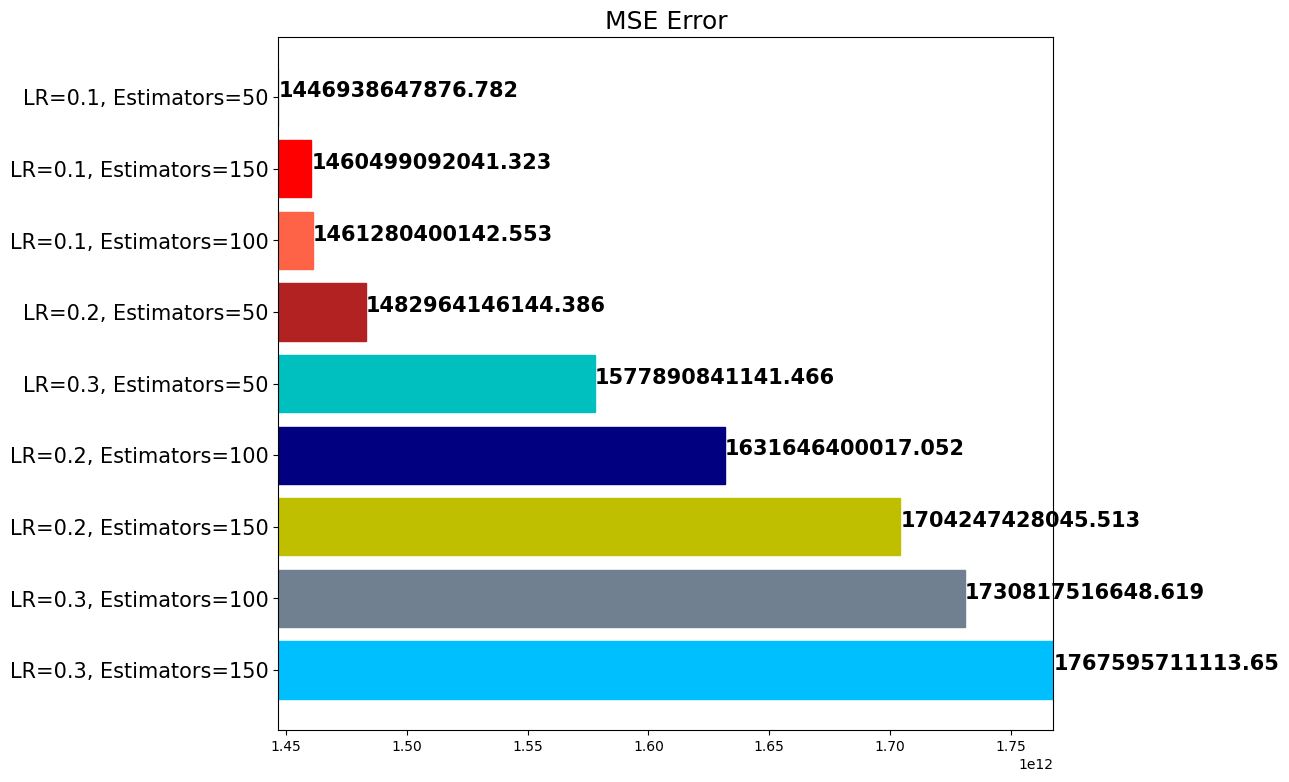

In [208]:
learning_rates = [0.1, 0.2, 0.3]
n_estimators = [50, 100, 150]

for lr in learning_rates:
    for n in n_estimators:
        model_name = f'LR={lr}, Estimators={n}'
        model = GradientBoostingRegressor(learning_rate=lr, n_estimators=n, random_state=2024)
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        mse_eval(model_name, y_test_pred, y_test)


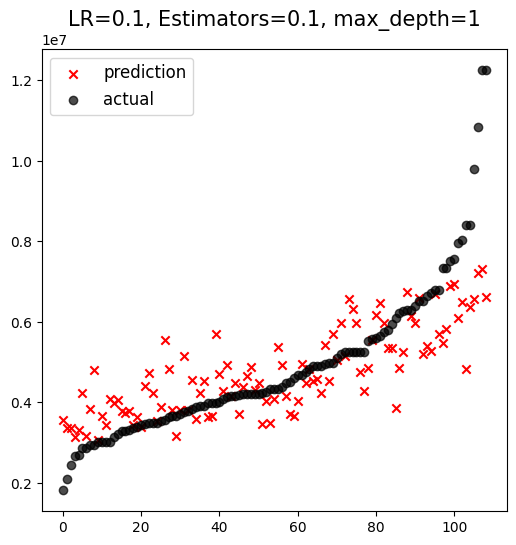

                                 model           mse
0               LR=0.3, Estimators=150  1.767596e+12
1               LR=0.3, Estimators=100  1.730818e+12
2               LR=0.2, Estimators=150  1.704247e+12
3               LR=0.2, Estimators=100  1.631646e+12
4                LR=0.3, Estimators=50  1.577891e+12
5  LR=0.1, Estimators=0.1, max_depth=1  1.570026e+12
6                LR=0.2, Estimators=50  1.482964e+12
7               LR=0.1, Estimators=100  1.461280e+12
8               LR=0.1, Estimators=150  1.460499e+12
9                LR=0.1, Estimators=50  1.446939e+12


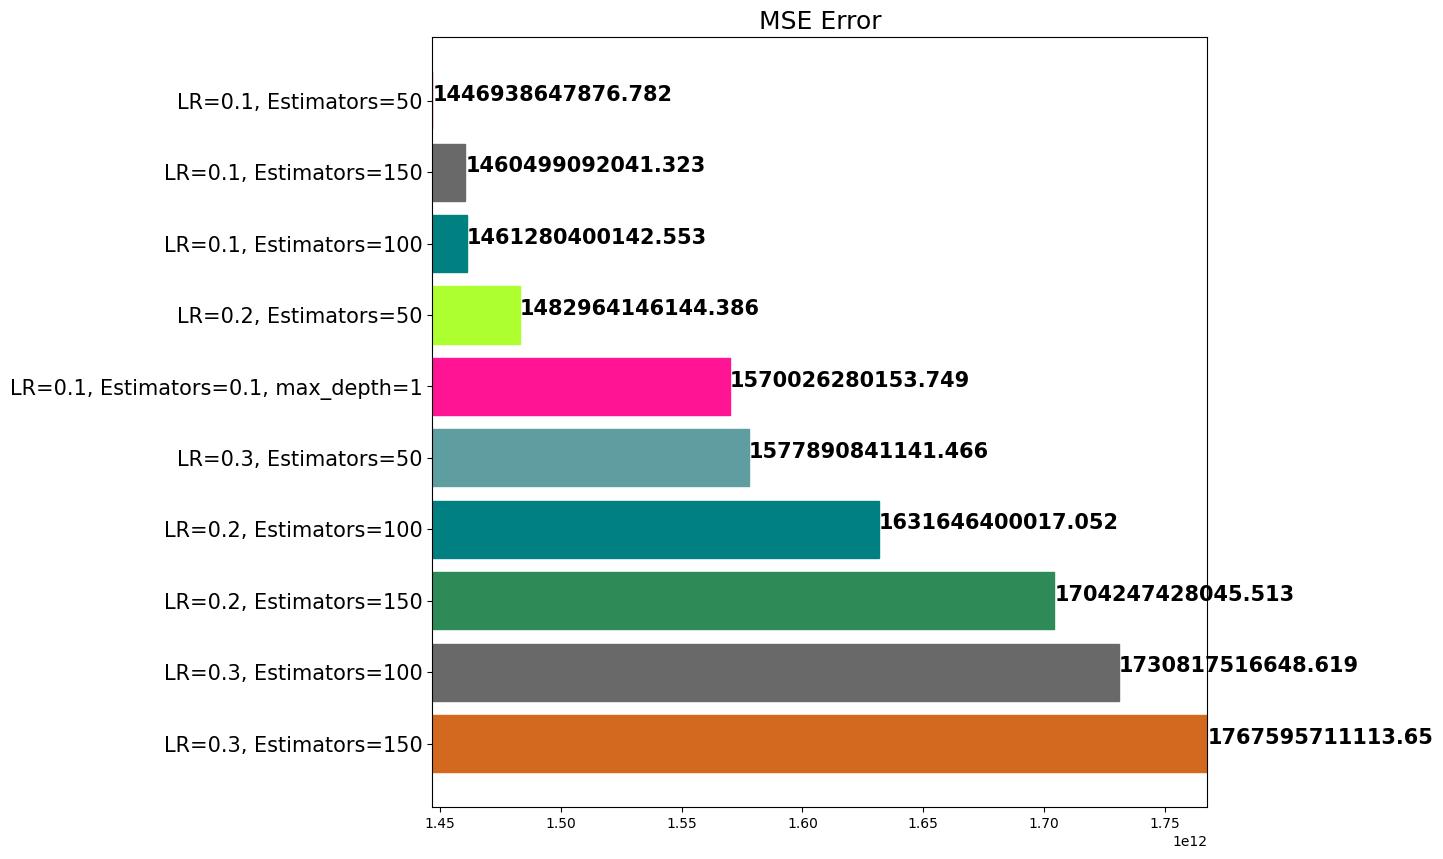

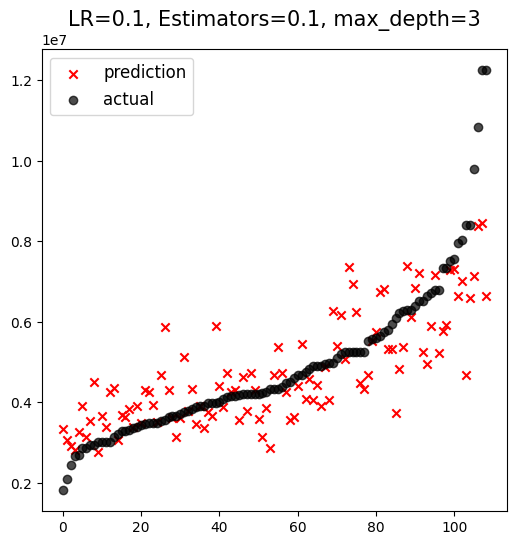

                                  model           mse
0                LR=0.3, Estimators=150  1.767596e+12
1                LR=0.3, Estimators=100  1.730818e+12
2                LR=0.2, Estimators=150  1.704247e+12
3                LR=0.2, Estimators=100  1.631646e+12
4                 LR=0.3, Estimators=50  1.577891e+12
5   LR=0.1, Estimators=0.1, max_depth=1  1.570026e+12
6                 LR=0.2, Estimators=50  1.482964e+12
7                LR=0.1, Estimators=100  1.461280e+12
8                LR=0.1, Estimators=150  1.460499e+12
9                 LR=0.1, Estimators=50  1.446939e+12
10  LR=0.1, Estimators=0.1, max_depth=3  1.446939e+12


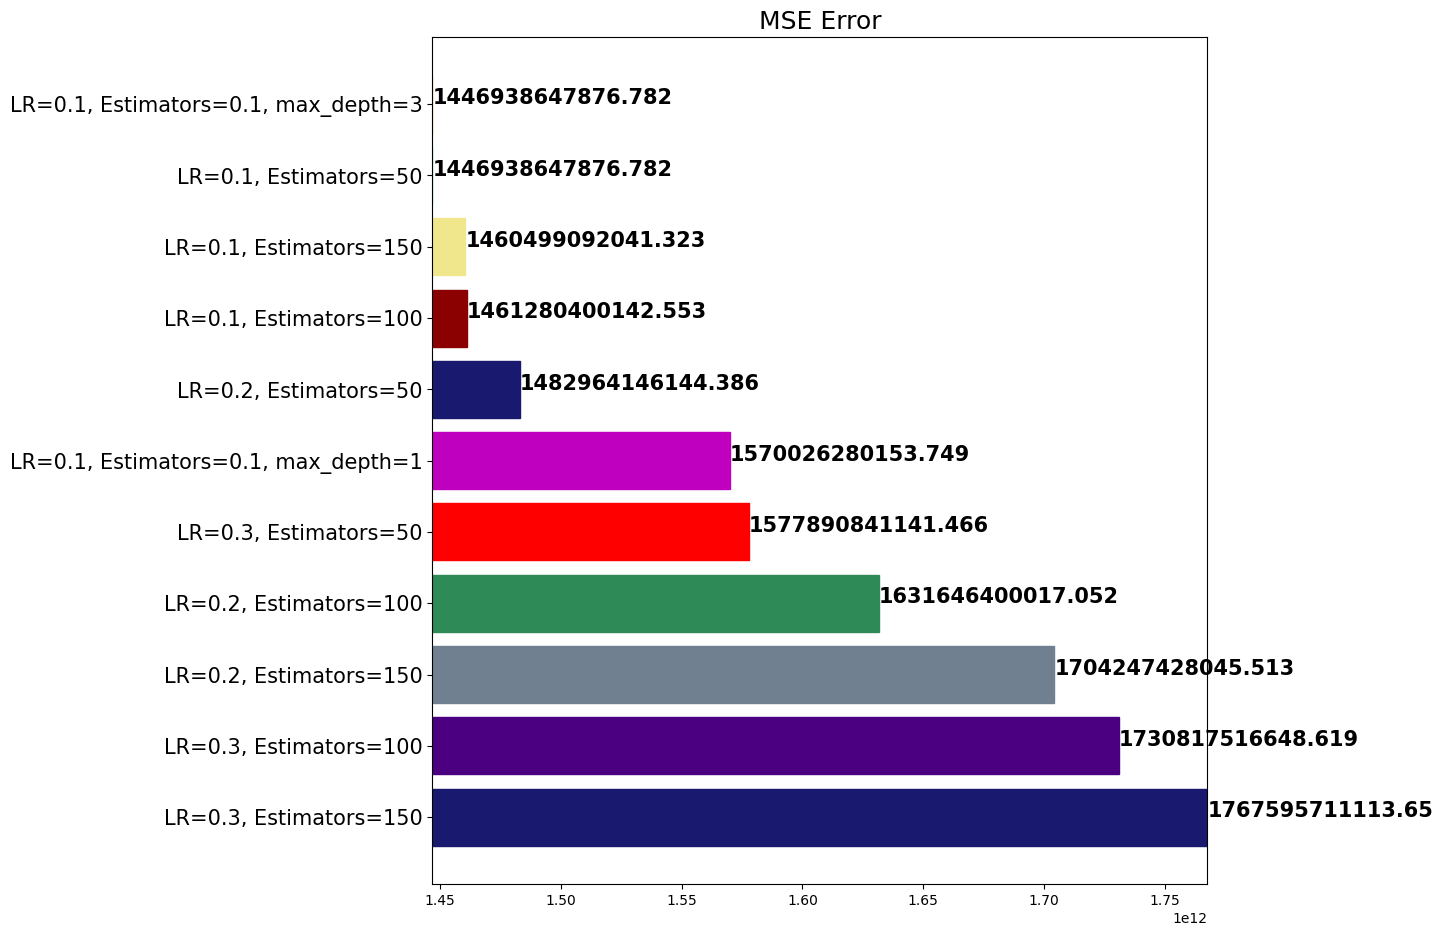

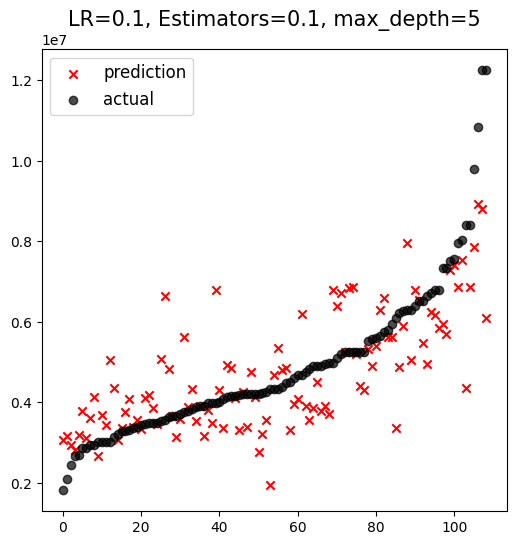

                                  model           mse
0                LR=0.3, Estimators=150  1.767596e+12
1                LR=0.3, Estimators=100  1.730818e+12
2                LR=0.2, Estimators=150  1.704247e+12
3   LR=0.1, Estimators=0.1, max_depth=5  1.685049e+12
4                LR=0.2, Estimators=100  1.631646e+12
5                 LR=0.3, Estimators=50  1.577891e+12
6   LR=0.1, Estimators=0.1, max_depth=1  1.570026e+12
7                 LR=0.2, Estimators=50  1.482964e+12
8                LR=0.1, Estimators=100  1.461280e+12
9                LR=0.1, Estimators=150  1.460499e+12
10                LR=0.1, Estimators=50  1.446939e+12
11  LR=0.1, Estimators=0.1, max_depth=3  1.446939e+12


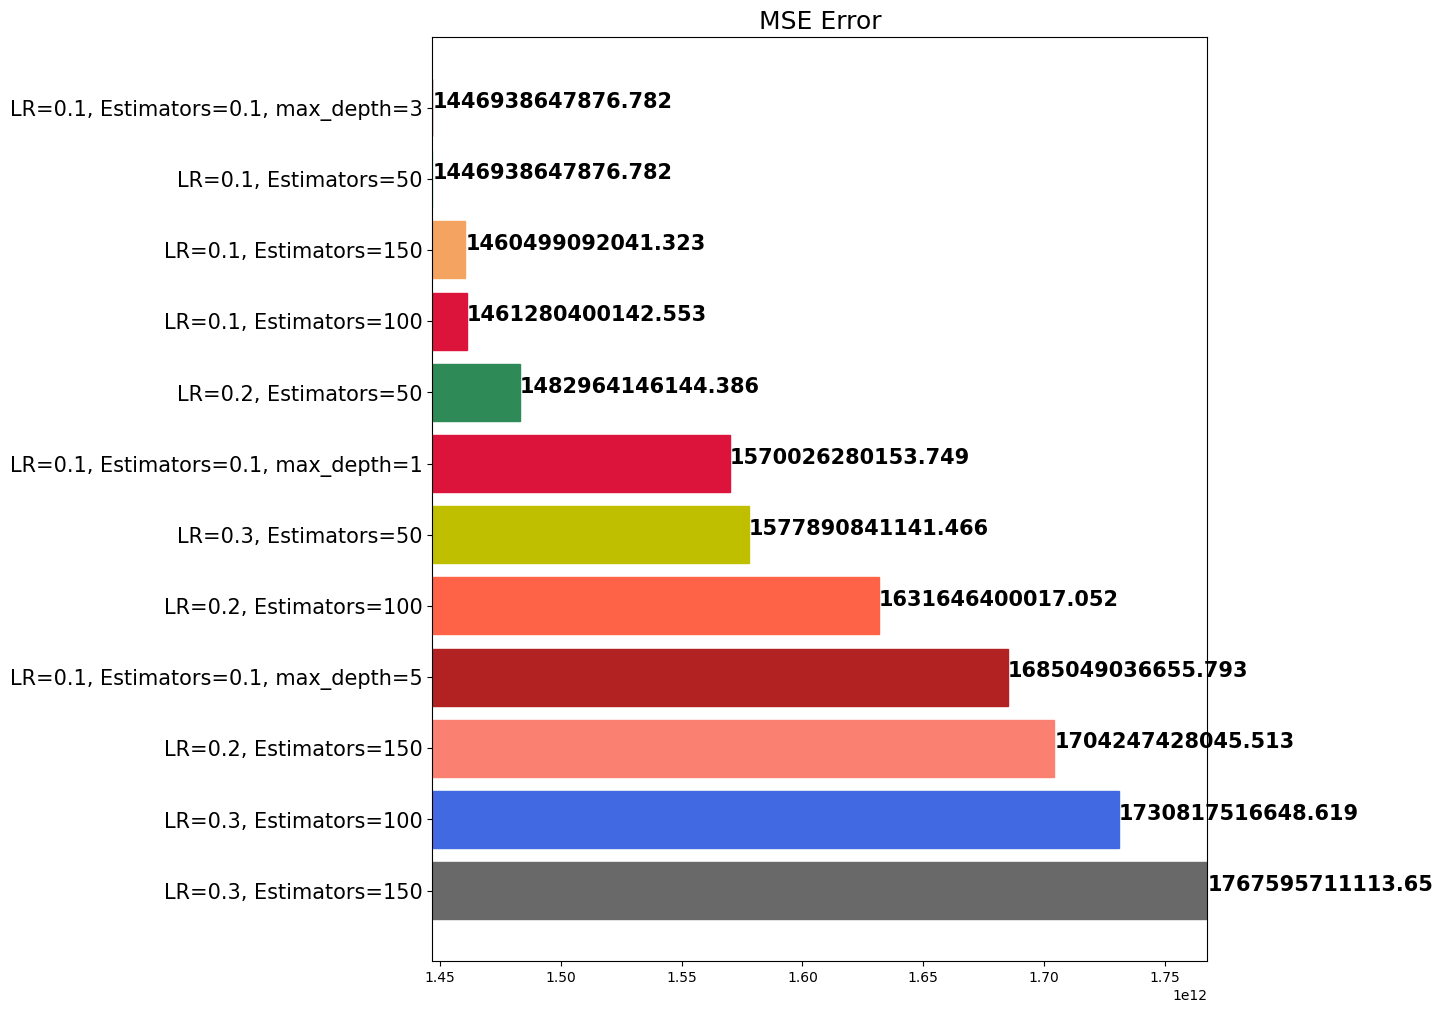

In [209]:
max_depths = [1, 3, 5]

for i in max_depths:
    model_name = f'LR=0.1, Estimators=0.1, max_depth={i}'
    model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, max_depth=i, random_state=2024)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    mse_eval(model_name, y_test_pred, y_test)